In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [79]:
# load the data
df = pd.read_excel("Customer_data.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.shape

(7043, 21)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [83]:
#checking missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [84]:
#removing null values
df.dropna(inplace=True)

In [85]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isnull().sum()

0

In [86]:
df.duplicated().sum()

0

In [87]:
#distribution of churn
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [88]:
# Map the Churn column ('Yes'/'No') to 1/0
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [134]:
#save the cleaned df
df.to_csv('cleaned_churn_data.csv', index=False)

#### Churn distribution

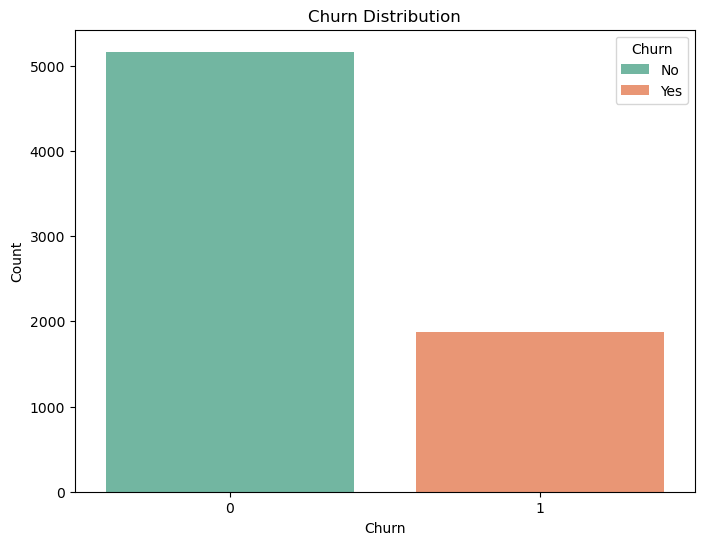

In [108]:

plt.figure(figsize=(8,6))
sns.countplot(x='Churn',data=df, hue='Churn',palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

#### Gender-wise churn stats

Gender-wise Churn Distribution (%):
 Churn           0          1
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


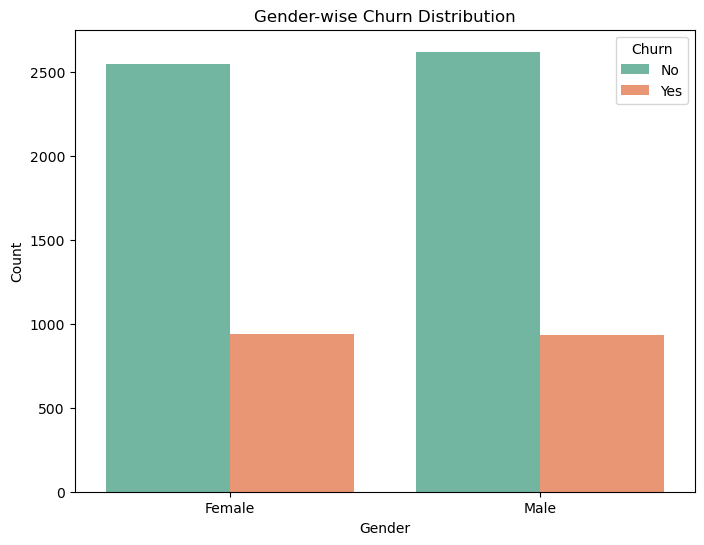

In [102]:

gender_churn_stats = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
print("Gender-wise Churn Distribution (%):\n", gender_churn_stats)

# Plot gender-wise churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title("Gender-wise Churn Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

#### Senior Citizen-wise churn stats

Senior Citizen-wise Churn Distribution (%):
 Churn                  0          1
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


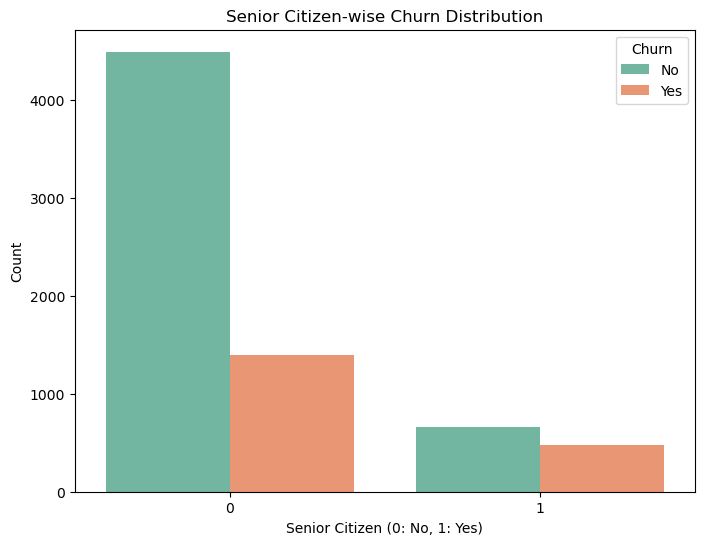

In [110]:

senior_citizen_churn_stats = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
print("Senior Citizen-wise Churn Distribution (%):\n", senior_citizen_churn_stats)

# Plot Senior Citizen-wise churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.title("Senior Citizen-wise Churn Distribution")
plt.xlabel("Senior Citizen (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

#### Correlation Heatmap

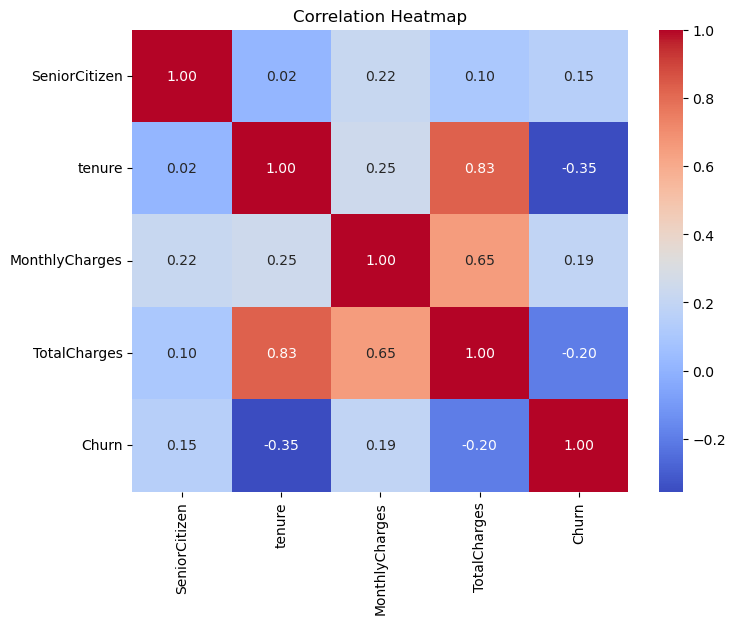

In [129]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
### More plots have been created using streamlit